#선형대수 파이썬-2

##1.최적근사(Best Approximation)

In [ ]:
import numpy as np

In [ ]:
##행렬을 입력하게 해주는 함수 선언

def input_matrix():

    print("행렬을 입력하세요. 각 행은 공백으로 구분된 숫자들을 입력하세요.")
    rows = []

    while True:
        row_input = input("행 입력 (종료하려면 'q' 입력): ").strip()

        if row_input.lower() == 'q':
            break

        row = [float(num) for num in row_input.split()]
        rows.append(row)

    matrix = np.array(rows)  # 리스트를 NumPy 배열로 변환

    return matrix


In [ ]:
input_matrix()

행렬을 입력하세요. 각 행은 공백으로 구분된 숫자들을 입력하세요.
행 입력 (종료하려면 'q' 입력): 4
행 입력 (종료하려면 'q' 입력): 5
행 입력 (종료하려면 'q' 입력): 7
행 입력 (종료하려면 'q' 입력): q


array([[4.],
       [5.],
       [7.]])

In [ ]:
matrix = input_matrix()

print("입력한 행렬:")
print(matrix)

행렬을 입력하세요. 각 행은 공백으로 구분된 숫자들을 입력하세요.
행 입력 (종료하려면 'q' 입력): 3 4 5
행 입력 (종료하려면 'q' 입력): 2 4 5
행 입력 (종료하려면 'q' 입력): 7 4 5
행 입력 (종료하려면 'q' 입력): 8 9 6
행 입력 (종료하려면 'q' 입력): q
입력한 행렬:
[[3. 4. 5.]
 [2. 4. 5.]
 [7. 4. 5.]
 [8. 9. 6.]]


In [ ]:
def b_a():
  A = input_matrix()
  b = input_matrix()

  x = np.linalg.solve(np.matmul(np.transpose(A),A),np.matmul(np.transpose(A),b))
  print()
  return print(x)

In [ ]:
b_a()

행렬을 입력하세요. 각 행은 공백으로 구분된 숫자들을 입력하세요.
행 입력 (종료하려면 'q' 입력): 1 4 7
행 입력 (종료하려면 'q' 입력): 4 5 6
행 입력 (종료하려면 'q' 입력): 1 0 0
행 입력 (종료하려면 'q' 입력): 2 1 1
행 입력 (종료하려면 'q' 입력): q
행렬을 입력하세요. 각 행은 공백으로 구분된 숫자들을 입력하세요.
행 입력 (종료하려면 'q' 입력): 1
행 입력 (종료하려면 'q' 입력): 4
행 입력 (종료하려면 'q' 입력): 5
행 입력 (종료하려면 'q' 입력): 7
행 입력 (종료하려면 'q' 입력): q

[[ 5.48015873]
 [-8.8531746 ]
 [ 4.41269841]]


- 최적근사를 통해 선형회귀

In [ ]:
def linreg(X, y):
    X_b = np.c_[X, np.ones_like(y)]
    w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    m = w[0]
    b = w[1]

    return m, b


In [ ]:
X = np.array([1, 4, 5, 7])
y = np.array([2, 3, 4, 8])


m, b = linreg(X, y)
print(m,"x+",b)

0.9466666666666668 x+ 0.22666666666666657


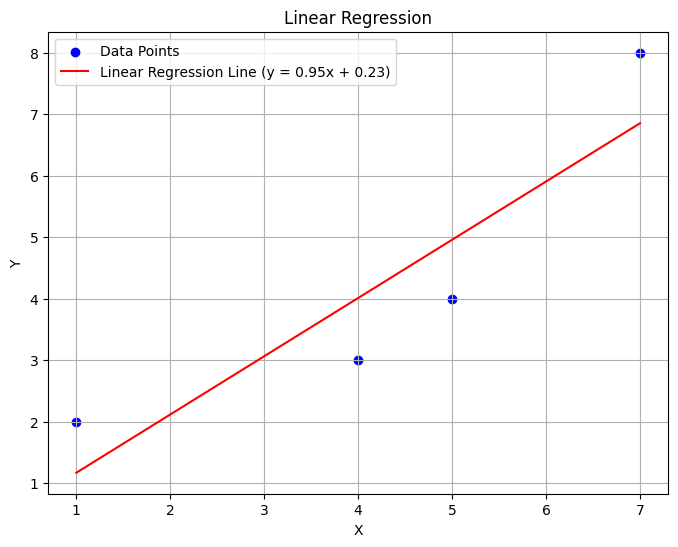

In [ ]:
# 데이터와 회귀 직선을 그래프로 시각화
import matplotlib.pyplot as plt

x_values = np.linspace(np.min(X), np.max(X), 100)
y_values = m * x_values + b
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label=f'Linear Regression Line (y = {m:.2f}x + {b:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

##2.QR분해(QR Decomposition) 및 최적근사

In [ ]:
A = np.array([[1,0,1],[0,1,1],[1,2,0]])

Q,R = np.linalg.qr(A)

print(Q)
print()
print(R)

[[-0.70710678  0.57735027 -0.40824829]
 [-0.         -0.57735027 -0.81649658]
 [-0.70710678 -0.57735027  0.40824829]]

[[-1.41421356 -1.41421356 -0.70710678]
 [ 0.         -1.73205081  0.        ]
 [ 0.          0.         -1.22474487]]


- QR 분해를 이용하여 최적근사해 찾기

In [ ]:
def qr_b_a():
  A = input_matrix()
  b = input_matrix()

  Q,R = np.linalg.qr(A)
  print(Q)
  print()
  print(R)

  x = np.matmul(np.matmul(np.linalg.inv(R),np.transpose(Q)),b)
  print()
  return print(x)

In [ ]:
qr_b_a()

행렬을 입력하세요. 각 행은 공백으로 구분된 숫자들을 입력하세요.
행 입력 (종료하려면 'q' 입력): 1 0 1
행 입력 (종료하려면 'q' 입력): 0 1 1
행 입력 (종료하려면 'q' 입력): 1 1 1
행 입력 (종료하려면 'q' 입력): q
행렬을 입력하세요. 각 행은 공백으로 구분된 숫자들을 입력하세요.
행 입력 (종료하려면 'q' 입력): 1
행 입력 (종료하려면 'q' 입력): 4
행 입력 (종료하려면 'q' 입력): 1
행 입력 (종료하려면 'q' 입력): q
[[-0.70710678  0.40824829 -0.57735027]
 [-0.         -0.81649658 -0.57735027]
 [-0.70710678 -0.40824829  0.57735027]]

[[-1.41421356 -0.70710678 -1.41421356]
 [ 0.         -1.22474487 -0.81649658]
 [ 0.          0.         -0.57735027]]

[[-3.00000000e+00]
 [ 1.11022302e-16]
 [ 4.00000000e+00]]


##3.고윳값 분해(EVD)와 특이값 분해(SVD)

- 고윳값 분해

In [ ]:
a = np.array([[3,0,1],[1,0,2],[2,1,1]])

e,v = np.linalg.eig(A)

print(e)
print()
print(v)

[-1.30277564  1.          2.30277564]

[[ 3.70046261e-01 -8.94427191e-01 -5.20070353e-01]
 [ 3.70046261e-01  4.47213595e-01 -5.20070353e-01]
 [-8.52133516e-01 -2.18982946e-16 -6.77534985e-01]]


- 특이값 분해

In [ ]:
B = np.array([[3,6],[2,3],[1,2],[5,5]])

U,S,Vt = np.linalg.svd(B)

print(U)
print()
print(S)
print()
print(Vt)

[[-0.6305882   0.65070051 -0.34404196  0.24613512]
 [-0.34294608  0.0720764   0.09856768 -0.93138466]
 [-0.21019607  0.21690017  0.9335582   0.19297931]
 [-0.66375005 -0.72411888 -0.01971354  0.18627693]]

[10.50804076  1.6065738 ]

[[-0.58113622 -0.8138063 ]
 [-0.8138063   0.58113622]]
